# The SIR Model

## Overview

The Susceptible-Infected-Recovered (SIR) model is an infectious epidemic model that can be applied in the context of disease spreading in a population. The SIR model assumes a simple closed population (no births, deaths, migration) and simple disease (no mutations or other ways to spread).

The SIR model divides the population in three categories:
- **Susceptible** ($S$) - people who have not yet been infected
- **Infected** ($I$) - currently sick and can transmit the disease to **Susceptibles**
- **Recovered** ($R$) - individuals who have stopped being **Infected**

In [4]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
import manim as mn
from manim import *
config.media_width = "75%"
config.verbosity = "WARNING"

### Parameters
- $\beta$ - transmission rate, describes how likely a person is to get infected, average number of contacts per person per day
- $\gamma$ - recovery rate, the fraction of infectious individuals who recover each day. ie if a person is infectious for 4 days, $\gamma = 1/4$

We can model the dynamics using the following equations: 

$\large \frac{dS}{dt} = -\beta SI$

The rate of change of the Susceptibles is negative because the number of Susceptibles decreases over time as more people get infected.

$\large \frac{dI}{dt} = \beta SI - \gamma I$

Susceptible people become infected, so if the $\beta SI$ term is subtracted from the Susceptible population, $\beta SI$ is added to the Infected population. Then, there are also losses of Infected people when they get recovered; therefore $-\gamma I$ is subtracted.

$\large\frac{dR}{dt} = \gamma I$

### Reproductive number

$R_0$ measures how many cases an infected person will create

$\large R_0 = \frac{\beta}{\gamma}$


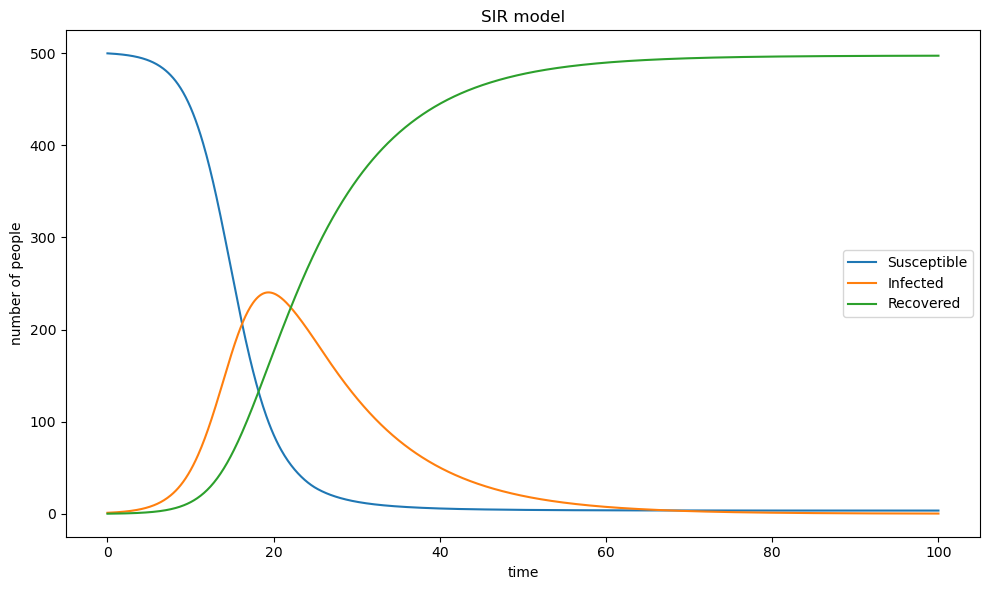

In [50]:
# params
beta = .001 # 0.001 # infection rate
gamma = .1 # 0.1 # recovery rate

# initial conditions
S0 = 500
I0 = 1
R0 = 0
initial_conditions = [S0, I0, R0]


t_start = 0
t_end = 100
t_eval = np.linspace(t_start, t_end, 1000)

def sir_dynamics(t, y):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

odesol = solve_ivp(sir_dynamics, [t_start, t_end], initial_conditions, t_eval=t_eval)


plt.figure(figsize=(10, 6))
plt.plot(odesol.t, odesol.y[0], label='Susceptible')
plt.plot(odesol.t, odesol.y[1], label='Infected')
plt.plot(odesol.t, odesol.y[2], label='Recovered')

# rnaught
# rnaught = beta / gamma
# plt.axhline(rnaught, color='gray', linestyle='--', linewidth=1)
# plt.text(t_end * 0.7, rnaught + 5, f'R_0 = {rnaught}', color='gray')

plt.xlabel('time')
plt.ylabel('number of people')
plt.title('SIR model')
plt.legend()
plt.tight_layout()
plt.show()

### Analysis

The initial number of susceptible people starts at 500 and drops as time passes. By the end, the number of susceptible people approaches zero because every person will have been infected. Likewise for the recovered people, if everyone has been infected, then recovered, the number of recovered people increases and gets close to 500. When the number of susceptible people is greater than the number of recovered, $\frac{dI}{dt}$ is positive/increasing. As the number of susceptible people drops, the negative term of $\frac{dI}{dt}$ dominates, and the infected population starts decreasing as they transition to be recovered more quickly than new cases of infection.

What happens if you double the transmission rate? Or halve the transmission rate? Ways this might happen include social distancing, handwashing, mask-wearing, etc. As shown in figures below, doubling $\beta$ causes the majority of the population to get infected in a shorter time. Reducing $\beta$ by half spreads out the curve and drastically slows the spread of disease.

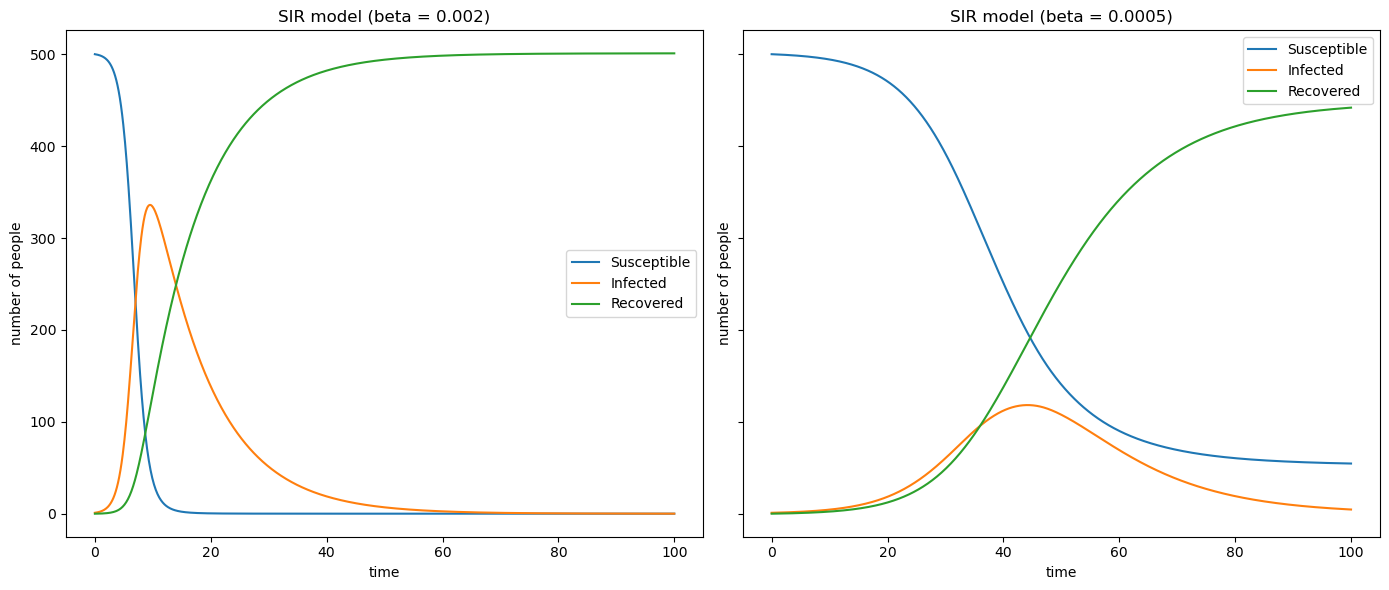

In [48]:
gamma = 0.1 # recovery rate

# Initial conditions
S0 = 500
I0 = 1
R0 = 0
initial_conditions = [S0, I0, R0]

t_start = 0
t_end = 100
t_eval = np.linspace(t_start, t_end, 1000)

def sir_dynamics(t, y, beta):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

beta_values = [0.002, 0.0005]

fig, axes = plt.subplots(1, len(beta_values), figsize=(14, 6), sharey=True)

for i, beta in enumerate(beta_values):
    sol = solve_ivp(lambda t, y: sir_dynamics(t, y, beta), [t_start, t_end], initial_conditions, t_eval=t_eval)

    axes[i].plot(sol.t, sol.y[0], label='Susceptible')
    axes[i].plot(sol.t, sol.y[1], label='Infected')
    axes[i].plot(sol.t, sol.y[2], label='Recovered')
    axes[i].set_title(f"SIR model (beta = {beta})")
    axes[i].set_xlabel('time')
    axes[i].set_ylabel('number of people')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [20]:
%%manim -qm SIRBetaSweep

class SIRBetaSweep(Scene):
    def construct(self):
        # SIR parameters
        gamma = 0.1
        S0, I0, R0 = 500, 1, 0
        N = S0 + I0 + R0
        t_eval = np.linspace(0, 100, 500)

        def sir_dynamics(t, y, beta):
            S, I, R = y
            dSdt = -beta/N * S * I
            dIdt = beta/N * S * I - gamma * I
            dRdt = gamma * I
            return [dSdt, dIdt, dRdt]

        def solve_sir(beta):
            sol = solve_ivp(lambda t, y: sir_dynamics(t, y, beta), [0, 100], [S0, I0, R0], t_eval=t_eval)
            return sol.t, sol.y

        # Axes
        axes = Axes(
            x_range=[0, 100, 10],
            y_range=[0, S0 + 10, 100],
            x_length=10,
            y_length=6,
            # axis_config={"font_size": 24},
            axis_config={"include_tip": False},
            x_axis_config={
                "numbers_to_include": np.arange(0, 101, 20),
                "font_size": 24,
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 501, 100),
                "font_size": 24,
            },
            tips=False
        )

        labels = axes.get_axis_labels(x_label="time", y_label="population")
        self.play(Create(axes), Write(labels))

        # Declare mutable current_beta before using it in always_redraw
        current_beta = [0.01]

        # Initial plot
        t, (S, I, R) = solve_sir(current_beta[0])
        s_graph = axes.plot_line_graph(t, S, line_color=BLUE, add_vertex_dots=False).set_z_index(1)
        i_graph = axes.plot_line_graph(t, I, line_color=RED, add_vertex_dots=False).set_z_index(1)
        r_graph = axes.plot_line_graph(t, R, line_color=GREEN, add_vertex_dots=False).set_z_index(1)
        self.play(Create(s_graph), Create(i_graph), Create(r_graph))

        # β label
        beta_text = always_redraw(lambda: Text(f"β = {current_beta[0]:.2f}", font_size=36)
                                   .next_to(axes, UP, buff=0.5).to_edge(LEFT))
        r0_text = always_redraw(lambda: Text(f"R₀ = {current_beta[0]/gamma:.2f}", font_size=36)
                                 .next_to(axes, UP, buff=0.5).to_edge(RIGHT))

        self.play(Write(beta_text), Write(r0_text))
        self.add(beta_text, r0_text)
        self.play(Write(beta_text))
        self.add(beta_text)

        # Animate through beta values
        beta_vals = np.linspace(0.01, 1.0, 30)

        for beta in beta_vals[1:]:
            t, (S_new, I_new, R_new) = solve_sir(beta)

            new_s_graph = axes.plot_line_graph(t, S_new, line_color=BLUE, add_vertex_dots=False)
            new_i_graph = axes.plot_line_graph(t, I_new, line_color=RED, add_vertex_dots=False)
            new_r_graph = axes.plot_line_graph(t, R_new, line_color=GREEN, add_vertex_dots=False)

            current_beta[0] = beta  # update for display

            self.play(
                Transform(s_graph, new_s_graph),
                Transform(i_graph, new_i_graph),
                Transform(r_graph, new_r_graph),
                run_time=0.5
            )

        # self.wait(2)

Manim Community v0.19.0

In [23]:
%%manim -qm SmoothSIRAnimation

# courtesy of chatgpt

from scipy.interpolate import interp1d

class SmoothSIRAnimation(Scene):
    def construct(self):
        # Parameters
        gamma = 0.1
        S0, I0, R0_init = 500, 1, 0
        N = S0 + I0 + R0_init
        t_eval = np.linspace(0, 100, 500)
        beta_vals = np.linspace(0.01, 1.0, 100)

        # Solve SIR for each beta
        S_solutions = []
        I_solutions = []
        R_solutions = []

        def sir_dynamics(t, y, beta):
            S, I, R = y
            dSdt = -beta / N * S * I
            dIdt = beta / N * S * I - gamma * I
            dRdt = gamma * I
            return [dSdt, dIdt, dRdt]

        for beta in beta_vals:
            sol = solve_ivp(lambda t, y: sir_dynamics(t, y, beta), [0, 100], [S0, I0, R0_init], t_eval=t_eval)
            S_solutions.append(sol.y[0])
            I_solutions.append(sol.y[1])
            R_solutions.append(sol.y[2])

        S_array = np.array(S_solutions)
        I_array = np.array(I_solutions)
        R_array = np.array(R_solutions)

        # Interpolators over beta
        S_interp = lambda t_idx, beta_val: np.interp(beta_val, beta_vals, S_array[:, t_idx])
        I_interp = lambda t_idx, beta_val: np.interp(beta_val, beta_vals, I_array[:, t_idx])
        R_interp = lambda t_idx, beta_val: np.interp(beta_val, beta_vals, R_array[:, t_idx])

        # Axes
        axes = Axes(
            x_range=[0, 100, 10],
            y_range=[0, S0 + 10, 100],
            x_length=10,
            y_length=6,
            # axis_config={"font_size": 24},
            axis_config={"include_tip": False},
            x_axis_config={
                "numbers_to_include": np.arange(0, 101, 20),
                "font_size": 24,
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 501, 100),
                "font_size": 24,
            },
            tips=False
        )
        self.play(Create(axes), Write(axes.get_axis_labels("Time", "Population")))

        # ValueTracker for beta
        beta_tracker = ValueTracker(0.01)

        # Line functions updated with beta
        def get_graph_data(interp_fn):
            return [axes.c2p(t, interp_fn(i, beta_tracker.get_value())) for i, t in enumerate(t_eval)]

        s_graph = always_redraw(lambda: VMobject().set_points_smoothly(get_graph_data(S_interp)).set_stroke(BLUE, 2))
        i_graph = always_redraw(lambda: VMobject().set_points_smoothly(get_graph_data(I_interp)).set_stroke(RED, 2))
        r_graph = always_redraw(lambda: VMobject().set_points_smoothly(get_graph_data(R_interp)).set_stroke(GREEN, 2))

        # β and R₀ labels
        beta_label = always_redraw(lambda: Text(f"β = {beta_tracker.get_value():.2f}", font_size=36)
                                   .next_to(axes, UP, buff=0.5).to_edge(LEFT))
        r0_label = always_redraw(lambda: Text(f"R₀ = {beta_tracker.get_value() / gamma:.2f}", font_size=36)
                                 .next_to(axes, UP, buff=0.5).to_edge(RIGHT))

        self.add(s_graph, i_graph, r_graph, beta_label, r0_label)

        # Animate beta from 0.01 to 1.0 smoothly
        self.play(beta_tracker.animate.set_value(1.0), run_time=12, rate_func=linear)
        self.wait(2)


Manim Community v0.19.0

## Discussion

In the classical SIR model, infections always die out, and once-infected people are immune indefinitely. Other models extend the classical model to simulate more interesting dynamics such as accounting for births/deaths in the initial susceptible population, reinfection of recovered people

$\large \frac{dS}{dt} = -\beta SI$

The rate of change of the Susceptibles is negative because the number of Susceptibles decreases over time as more people get infected.

$\large \frac{dI}{dt} = \beta SI - \gamma I$

Susceptible people become infected, so if the $\beta SI$ term is subtracted from the Susceptible population, $\beta SI$ is added to the Infected population. Then, there are also losses of Infected people when they get recovered; therefore $-\gamma I$ is subtracted.

$\large\frac{dR}{dt} = \gamma I$

In [58]:
%%manim -qm TransformEquation

class TransformEquation(Scene):
    def construct(self):
        eq1 = MathTex(r"\frac{dS}{dt} = -\beta SI")
        eq2 = MathTex(r"\frac{dI}{dt} = \beta SI - \gamma I")
        eq3 = MathTex(r"\frac{dR}{dt} = \gamma I")
        self.add(eq1)
        self.wait()
        self.play(TransformMatchingTex(eq1, eq2))
        self.wait()
        self.play(TransformMatchingShapes(eq2, eq3))
        self.wait()

Manim Community v0.19.0